In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from keras.layers import *
from keras.models import Model


In [3]:
from PIL import Image, ImageOps
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
from keras.models import load_model

In [5]:
input_shape = (64, 64, 3)
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", 
                 activation='relu',
                 input_shape=input_shape))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 64)        0

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
Generator = ImageDataGenerator(rescale=1/255.)

In [9]:
train_gen = Generator.flow_from_directory(r'C:\Users\ADMIN\Downloads\deeplearning\remote\train', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

val_gen = Generator.flow_from_directory(r'C:\Users\ADMIN\Downloads\deeplearning\remote\validation', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 81 images belonging to 2 classes.
Found 81 images belonging to 2 classes.


In [10]:
epochs = 50
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, 
                    epochs=epochs, 
                    validation_data=val_gen)

Epoch 1/50
3/3 [==============================] - 2s 478ms/step - loss: 2.6931 - accuracy: 0.4938 - val_loss: 1.6195 - val_accuracy: 0.4938
Epoch 2/50
3/3 [==============================] - 1s 280ms/step - loss: 1.6072 - accuracy: 0.5556 - val_loss: 0.9705 - val_accuracy: 0.5062
Epoch 3/50
3/3 [==============================] - 1s 344ms/step - loss: 1.2408 - accuracy: 0.5309 - val_loss: 0.6941 - val_accuracy: 0.5062
Epoch 4/50
3/3 [==============================] - 1s 357ms/step - loss: 0.7808 - accuracy: 0.4815 - val_loss: 0.7151 - val_accuracy: 0.4938
Epoch 5/50
3/3 [==============================] - 1s 298ms/step - loss: 0.7844 - accuracy: 0.4568 - val_loss: 0.6988 - val_accuracy: 0.4938
Epoch 6/50
3/3 [==============================] - 1s 293ms/step - loss: 0.7165 - accuracy: 0.4691 - val_loss: 0.6933 - val_accuracy: 0.4938
Epoch 7/50
3/3 [==============================] - 1s 299ms/step - loss: 0.7032 - accuracy: 0.4815 - val_loss: 0.6931 - val_accuracy: 0.5185
Epoch 8/50
3/3 [====

In [11]:
model.save(r"C:\Users\ADMIN\Downloads\deeplearning\remote\converted_keras-remote\my_model-220916-remote-ver2.h5")

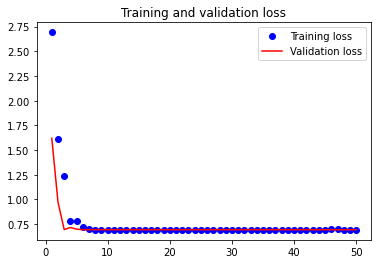

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
test_gen = Generator.flow_from_directory (r'C:\Users\ADMIN\Downloads\deeplearning\remote\test1', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 41 images belonging to 1 classes.


In [14]:
score = model.evaluate(test_gen, verbose=0)
print(f'Test loss: {score[0]:.3f}')
print(f'Test accuracy: {score[1]:.3f}')

Test loss: 0.689
Test accuracy: 0.634


In [15]:
import numpy as np

x_tests, y_tests = [], []
for i in range(len(test_gen)):
  x_test, y_test = next(test_gen)
  x_tests.append(x_test)
  y_tests.append(y_test)

x_test = np.concatenate(x_tests, axis=0)
y_test = np.concatenate(y_tests, axis=0)

print(x_test.shape)
print(y_test.shape)

(41, 64, 64, 3)
(41,)


In [16]:
pred = model.predict(x_test[:25000])

print(pred)
# for i in range(4):
#    plt.imshow(x_test[i])
#    plt.title(pred[i])
#    plt.show()

2/2 [==============================] - 0s 9ms/step
[[0.50129795]
 [0.49222046]
 [0.503238  ]
 [0.4984967 ]
 [0.49578714]
 [0.4990638 ]
 [0.5117968 ]
 [0.49858642]
 [0.48849946]
 [0.49710366]
 [0.49909395]
 [0.50387836]
 [0.49610704]
 [0.50221515]
 [0.49689406]
 [0.50412   ]
 [0.5063476 ]
 [0.49545535]
 [0.50385   ]
 [0.49822688]
 [0.5035883 ]
 [0.49775454]
 [0.4963314 ]
 [0.49605837]
 [0.49200714]
 [0.49664402]
 [0.49834722]
 [0.49845263]
 [0.4963529 ]
 [0.5024059 ]
 [0.50223804]
 [0.49780118]
 [0.48482826]
 [0.4882363 ]
 [0.50050205]
 [0.5049577 ]
 [0.4963008 ]
 [0.48787037]
 [0.5039904 ]
 [0.50058305]
 [0.48523805]]


In [17]:
ex63 = pd.DataFrame(pred)

In [18]:
print(ex63)

           0
0   0.501298
1   0.492220
2   0.503238
3   0.498497
4   0.495787
5   0.499064
6   0.511797
7   0.498586
8   0.488499
9   0.497104
10  0.499094
11  0.503878
12  0.496107
13  0.502215
14  0.496894
15  0.504120
16  0.506348
17  0.495455
18  0.503850
19  0.498227
20  0.503588
21  0.497755
22  0.496331
23  0.496058
24  0.492007
25  0.496644
26  0.498347
27  0.498453
28  0.496353
29  0.502406
30  0.502238
31  0.497801
32  0.484828
33  0.488236
34  0.500502
35  0.504958
36  0.496301
37  0.487870
38  0.503990
39  0.500583
40  0.485238


In [19]:
ex63.to_excel(excel_writer=r'C:\Users\ADMIN\Downloads\deeplearning\remote\test1-remote-220916-ver2.xlsx')

In [20]:
train_gen.class_indices

{'defective': 0, 'non-defective': 1}

종료입니다. 아래부터는 테스트입니다.

In [10]:
epochs = 40
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, 
                    epochs=epochs, 
                    validation_data=val_gen)

Epoch 1/40
19/19 [==============================] - 4s 193ms/step - loss: 0.4494 - accuracy: 0.7940 - val_loss: 0.6434 - val_accuracy: 0.6383
Epoch 2/40
19/19 [==============================] - 3s 177ms/step - loss: 0.3918 - accuracy: 0.8272 - val_loss: 0.6865 - val_accuracy: 0.6533
Epoch 3/40
19/19 [==============================] - 3s 165ms/step - loss: 0.3697 - accuracy: 0.8439 - val_loss: 0.6741 - val_accuracy: 0.6600
Epoch 4/40
19/19 [==============================] - 3s 161ms/step - loss: 0.3292 - accuracy: 0.8704 - val_loss: 0.6900 - val_accuracy: 0.6433
Epoch 5/40
19/19 [==============================] - 3s 159ms/step - loss: 0.2804 - accuracy: 0.8904 - val_loss: 0.7031 - val_accuracy: 0.6667
Epoch 6/40
19/19 [==============================] - 3s 161ms/step - loss: 0.2499 - accuracy: 0.9020 - val_loss: 0.7286 - val_accuracy: 0.6633
Epoch 7/40
19/19 [==============================] - 3s 161ms/step - loss: 0.2070 - accuracy: 0.9136 - val_loss: 0.7537 - val_accuracy: 0.6867
Epoch 

In [11]:
model.save(r"C:\Users\ADMIN\Downloads\deeplearning\python_catdog\220915\my_model-220915-epoch50.h5")

In [15]:
from keras.models import load_model

In [16]:
model = load_model(r'C:\Users\ADMIN\Downloads\deeplearning\python_catdog\220915\my_model-220915-ver1.h5')

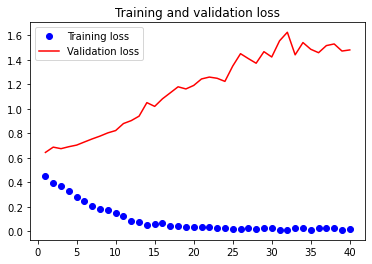

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
test_gen = Generator.flow_from_directory (r'C:\Users\ADMIN\Downloads\deeplearning\python_catdog\train\train', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 25000 images belonging to 2 classes.


In [22]:
score = model.evaluate(test_gen, verbose=0)
print(f'Test loss: {score[0]:.3f}')
print(f'Test accuracy: {score[1]:.3f}')

Test loss: 0.654
Test accuracy: 0.634


In [23]:
import numpy as np

x_tests, y_tests = [], []
for i in range(len(test_gen)):
  x_test, y_test = next(test_gen)
  x_tests.append(x_test)
  y_tests.append(y_test)

x_test = np.concatenate(x_tests, axis=0)
y_test = np.concatenate(y_tests, axis=0)

print(x_test.shape)
print(y_test.shape)

(25000, 64, 64, 3)
(25000,)


In [24]:
pred = model.predict(x_test[:25000])

print(pred)
# for i in range(4):
#    plt.imshow(x_test[i])
#    plt.title(pred[i])
#    plt.show()

782/782 [==============================] - 13s 17ms/step
[[0.6388203 ]
 [0.44409272]
 [0.9762753 ]
 ...
 [0.5722553 ]
 [0.49792293]
 [0.65900266]]


In [ ]:
from PIL import Image, ImageOps
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
ex63 = pd.DataFrame(pred)

In [28]:
print(ex63)

              0
0      0.638820
1      0.444093
2      0.976275
3      0.648106
4      0.347574
...         ...
24995  0.059427
24996  0.429309
24997  0.572255
24998  0.497923
24999  0.659003

[25000 rows x 1 columns]


In [29]:
ex63.to_excel(excel_writer=r'C:\Users\ADMIN\Downloads\deeplearning\python_catdog\test1-220915-epoch10.xlsx')